In [12]:
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow

In [13]:
df_test = r'C:\Users\sanja\OneDrive\Documents\ESE\MY_data\test'
df_train= r'C:\Users\sanja\OneDrive\Documents\ESE\MY_data\train'
df_predict=r'C:\Users\sanja\OneDrive\Documents\ESE\MY_data\predict'

In [29]:
directories_train={r'C:\Users\sanja\OneDrive\Documents\ESE\MY_data\train\Apple':0,
            r'C:\Users\sanja\OneDrive\Documents\ESE\MY_data\train\avocado':1,
            r'C:\Users\sanja\OneDrive\Documents\ESE\MY_data\train\Banana':2,
            r'C:\Users\sanja\OneDrive\Documents\ESE\MY_data\train\cherry':3,
            r'C:\Users\sanja\OneDrive\Documents\ESE\MY_data\train\kiwi':4,
            r'C:\Users\sanja\OneDrive\Documents\ESE\MY_data\train\mango':5,
            r'C:\Users\sanja\OneDrive\Documents\ESE\MY_data\train\orange':6,
            r'C:\Users\sanja\OneDrive\Documents\ESE\MY_data\train\pinenapple':7,
            r'C:\Users\sanja\OneDrive\Documents\ESE\MY_data\train\strawberries':8,
            r'C:\Users\sanja\OneDrive\Documents\ESE\MY_data\train\watermelon':9}

In [15]:
import os
import cv2
import numpy as np

def preprocess_images(directory, size=(100, 100)):
    images = []
    labels = []
    for subdir, label in directory.items():
        files = os.listdir(subdir)
        for file in files:
            img_path = os.path.join(subdir, file)
            img = cv2.imread(img_path)
            if img is not None: 
                img = cv2.resize(img, size)  
                img = img.astype('float32') / 255.0  
                images.append(img)
                labels.append(label)
            else:
                print(f"Failed to read image: {img_path}")
    return np.array(images), np.array(labels)

images, labels = preprocess_images(directories)


Failed to read image: C:\Users\sanja\OneDrive\Documents\ESE\MY_data\train\orange\img_2731.jpeg


In [16]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)


In [17]:
# Print the shapes of the datasets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Test labels shape:", y_test.shape)

Training set shape: (1610, 100, 100, 3)
Validation set shape: (483, 100, 100, 3)
Test set shape: (207, 100, 100, 3)
Training labels shape: (1610,)
Validation labels shape: (483,)
Test labels shape: (207,)


CNN Architecture


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout

model = Sequential()

# Conv1 with batch normalisation
model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv2 with Batch Normalization
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv3 with Batch Normalization
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# FCL 1
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5)) 

# Output layer
model.add(Dense(10, activation='softmax'))

model.summary()



C:\Users\sanja\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,539,018 (36.39 MB)

 Trainable params: 9,537,546 (36.38 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [20]:
from keras.utils import to_categorical

num_classes = 10

y_train_one_hot = to_categorical(y_train, num_classes=num_classes)




In [21]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train_encoded, batch_size=32, epochs=10, validation_data=(X_val, y_val_encoded))


Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 478ms/step - accuracy: 0.3044 - loss: 2.3297 - val_accuracy: 0.1056 - val_loss: 2.6170
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 479ms/step - accuracy: 0.5601 - loss: 1.3015 - val_accuracy: 0.0932 - val_loss: 2.9720
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 518ms/step - accuracy: 0.6750 - loss: 0.9298 - val_accuracy: 0.1097 - val_loss: 3.4948
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 519ms/step - accuracy: 0.7893 - loss: 0.6403 - val_accuracy: 0.1449 - val_loss: 3.4037
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 39s 479ms/step - accuracy: 0.8124 - loss: 0.5901 - val_accuracy: 0.1449 - val_loss: 3.4147
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 25s 495ms/step - accuracy: 0.9032 - loss: 0.3080 - val_accuracy: 0.1532 - val_loss: 3.6297
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 25s 485ms/step - accuracy: 0.9330 - loss: 0.2358 - val_accuracy: 0.2836 - val_loss: 2.5824
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 475ms/step - accuracy: 0.9568 - loss: 0.1829 - val_accu

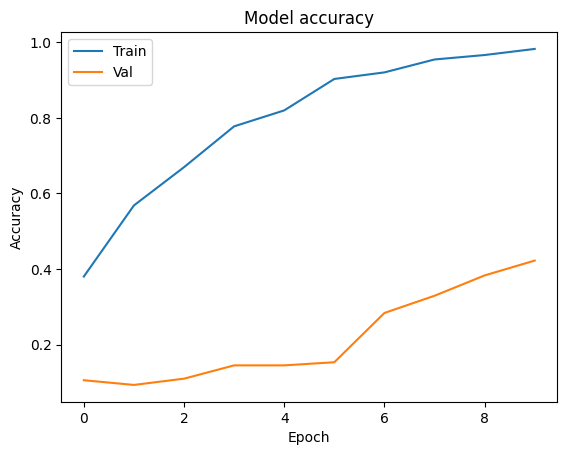

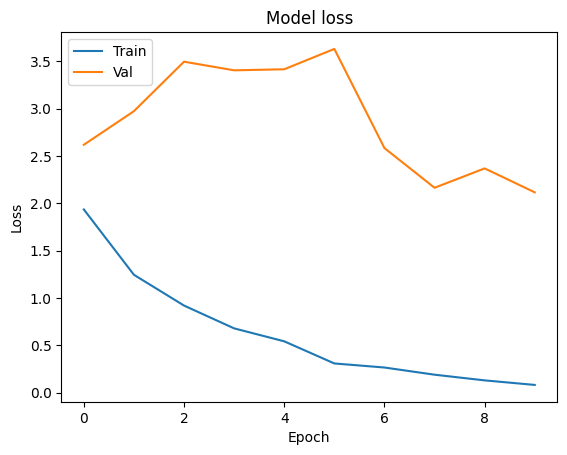

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


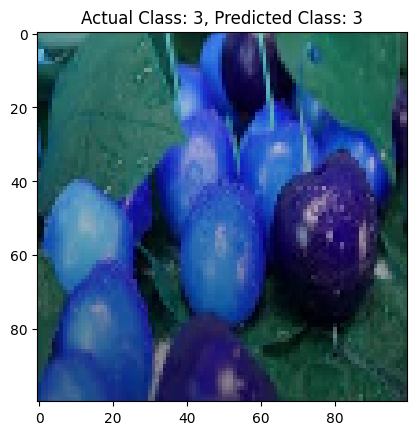

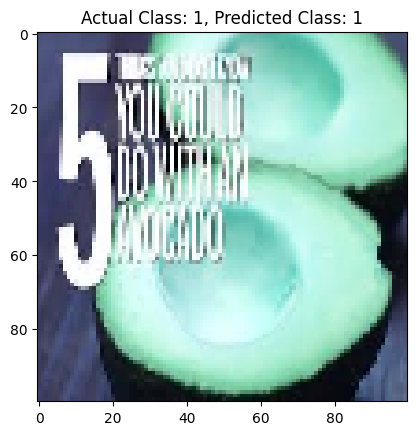

In [23]:
random_indices = np.random.choice(len(X_train), 2, replace=False)

random_images = X_train[random_indices]
random_labels = y_train[random_indices]

predictions = model.predict(random_images)

for i in range(2):
    plt.imshow(random_images[i])
    plt.title(f"Actual Class: {random_labels[i]}, Predicted Class: {np.argmax(predictions[i])}")
    plt.show()

In [24]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras import regularizers

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

for layer in vgg16_base.layers:
    layer.trainable = False

model1 = Sequential()

model1.add(vgg16_base)

model1.add(Flatten())

model1.add(Dense(512, kernel_regularizer=regularizers.l2(0.01)))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.5)) 

model1.add(Dense(10, activation='softmax'))

model1.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [31]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)


Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 48s 942ms/step - accuracy: 0.9713 - loss: 0.0879 - val_accuracy: 0.7267 - val_loss: 0.9265
Epoch 2/10
24/41 ━━━━━━━━━━━━━━━━━━━━ 13s 799ms/step - accuracy: 0.9873 - loss: 0.0391

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step 


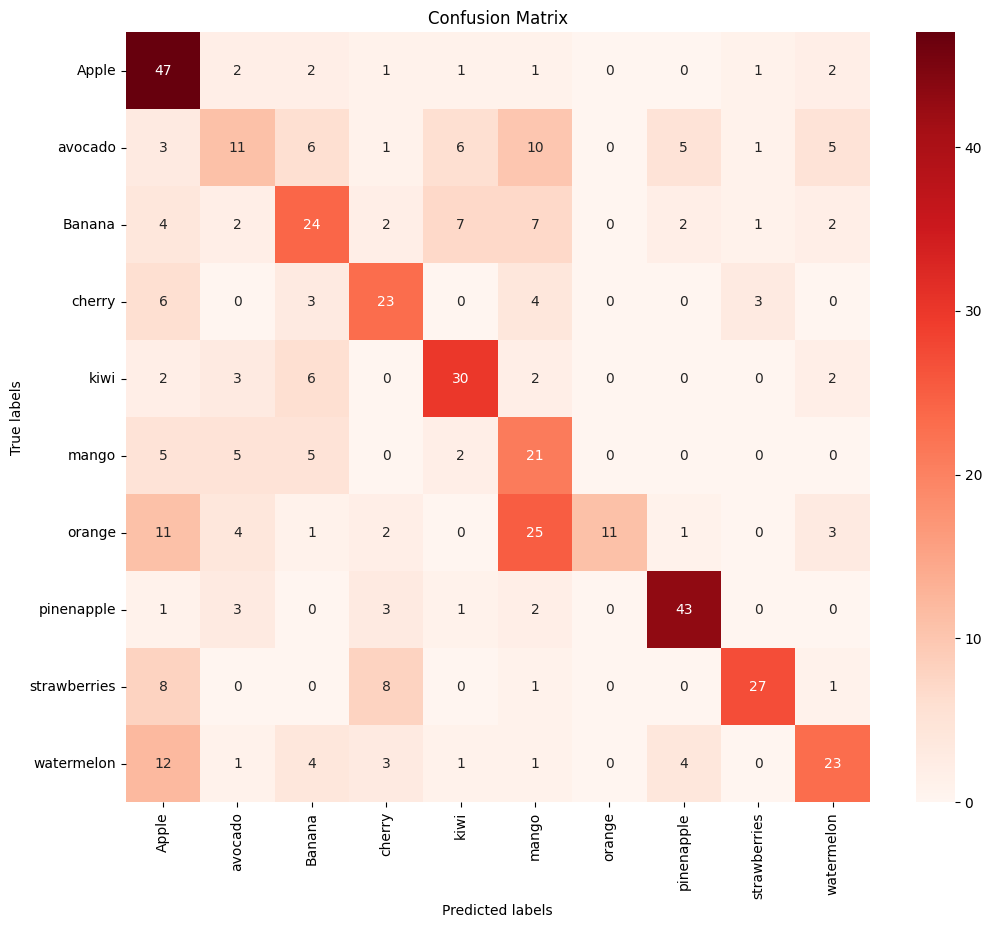

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_labels = ['Apple', 'avocado', 'Banana', 'cherry','kiwi','mango','orange','pinenapple','strawberries','watermelon']



y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

y_pred_labels = [class_labels[i] for i in y_pred_classes]
y_true_labels = [class_labels[i] for i in y_val]

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(12,10 ))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
